In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns
import streamlit as st


In [9]:
games = pd.read_csv('steam_top_games_07-11-2025_14-09-40.csv',converters={'Genres': pd.eval,'Tags': pd.eval})
games

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release,Tags,Recent Review Score,Recent Review Count,All Review Score,All Review Count,Date Collected
0,1.0,Counter-Strike 2,1049935,1725815,730,722199180,"[Action, Free To Play]","Aug 21, 2012",4707.0,"[FPS, Shooter, Multiplayer, Competitive, Actio...",8.0,68730.0,8.0,8884766.0,07-11-2025
1,2.0,Dota 2,515040,641549,570,300478436,"[Action, Strategy, Free To Play]","Jul 9, 2013",4385.0,"[Free to Play, MOBA, Multiplayer, Strategy, eS...",6.0,17792.0,8.0,2517279.0,07-11-2025
2,3.0,PUBG: BATTLEGROUNDS,312389,778327,578080,226521314,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 21, 2017",2759.0,"[Survival, Shooter, Battle Royale, Multiplayer...",5.0,18056.0,5.0,2576046.0,07-11-2025
3,4.0,Bongo Cat,150380,185291,3419430,108683711,"[Casual, Indie, Simulation, Free To Play]","Mar 5, 2025",128.0,"[Cats, Free to Play, Clicker, Casual, Cute, Id...",9.0,4579.0,9.0,27926.0,07-11-2025
4,5.0,Rust,143534,187345,252490,73547966,"[Action, Adventure, Indie, Massively Multiplay...","Feb 8, 2018",2710.0,"[Survival, Crafting, Multiplayer, Open World, ...",8.0,9831.0,8.0,1029310.0,07-11-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,171.0,House Flipper,7056,11739,613100,3221479,"[Indie, Simulation]","May 17, 2018",2612.0,"[Simulation, Design & Illustration, Singleplay...",8.0,1523.0,8.0,85906.0,07-11-2025
171,172.0,Blue Archive,7035,22049,3557620,986409,"[Adventure, Casual, RPG, Strategy, Free To Play]","Jul 3, 2025",8.0,"[Cute, Funny, Anime, Epic, RPG, Story Rich, St...",8.0,10539.0,8.0,10539.0,07-11-2025
172,173.0,Supermarket Together,6871,10035,2709570,4051317,"[Casual, Indie, Simulation, Free To Play]","Aug 9, 2024",336.0,"[Simulation, Online Co-Op, Multiplayer, Free t...",8.0,2673.0,8.0,70413.0,07-11-2025
173,174.0,Resident Evil 4,6857,12655,2050650,5506283,"[Action, Adventure]","Mar 23, 2023",841.0,"[Horror, Action, Survival Horror, Third-Person...",9.0,4662.0,9.0,122799.0,07-11-2025


In [10]:
games.head()

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release,Tags,Recent Review Score,Recent Review Count,All Review Score,All Review Count,Date Collected
0,1.0,Counter-Strike 2,1049935,1725815,730,722199180,"[Action, Free To Play]","Aug 21, 2012",4707.0,"[FPS, Shooter, Multiplayer, Competitive, Actio...",8.0,68730.0,8.0,8884766.0,07-11-2025
1,2.0,Dota 2,515040,641549,570,300478436,"[Action, Strategy, Free To Play]","Jul 9, 2013",4385.0,"[Free to Play, MOBA, Multiplayer, Strategy, eS...",6.0,17792.0,8.0,2517279.0,07-11-2025
2,3.0,PUBG: BATTLEGROUNDS,312389,778327,578080,226521314,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 21, 2017",2759.0,"[Survival, Shooter, Battle Royale, Multiplayer...",5.0,18056.0,5.0,2576046.0,07-11-2025
3,4.0,Bongo Cat,150380,185291,3419430,108683711,"[Casual, Indie, Simulation, Free To Play]","Mar 5, 2025",128.0,"[Cats, Free to Play, Clicker, Casual, Cute, Id...",9.0,4579.0,9.0,27926.0,07-11-2025
4,5.0,Rust,143534,187345,252490,73547966,"[Action, Adventure, Indie, Massively Multiplay...","Feb 8, 2018",2710.0,"[Survival, Crafting, Multiplayer, Open World, ...",8.0,9831.0,8.0,1029310.0,07-11-2025


In [11]:
print("July 11th:",len(games))

July 11th: 175


In [12]:
# .explode() each element of a listlike to a row, replicating index values
diff_genres = games['Genres'].explode().value_counts()
diff_genres

Genres
Action                   101
Adventure                 69
RPG                       59
Simulation                57
Indie                     54
Free To Play              46
Strategy                  44
Massively Multiplayer     30
Casual                    20
Early Access              13
Sports                    12
Racing                     6
Animation & Modeling       5
Utilities                  5
Design & Illustration      4
Video Production           3
Photo Editing              2
Education                  2
Game Development           1
None                       1
Audio Production           1
Software Training          1
Name: count, dtype: int64

In [13]:
diff_tags = games['Tags'].explode().value_counts()
diff_tags

Tags
Multiplayer     136
Singleplayer    124
Action          121
Co-op            85
Open World       76
               ... 
Vampire           1
GameMaker         1
Metroidvania      1
Hand-drawn        1
Epic              1
Name: count, Length: 305, dtype: int64

In [14]:
for key in diff_genres.keys():
    print(key)

Action
Adventure
RPG
Simulation
Indie
Free To Play
Strategy
Massively Multiplayer
Casual
Early Access
Sports
Racing
Animation & Modeling
Utilities
Design & Illustration
Video Production
Photo Editing
Education
Game Development
None
Audio Production
Software Training


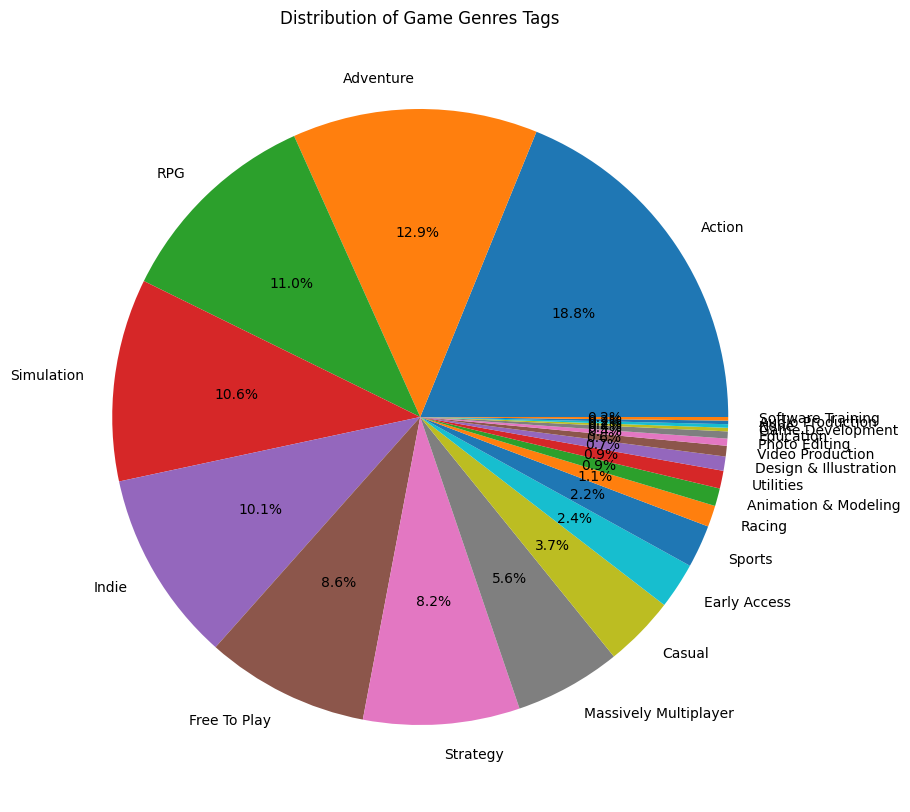

In [15]:
diff_genres.plot.pie(y='count', autopct='%1.1f%%', figsize=(10, 10), title='Distribution of Game Genres Tags')
plt.ylabel('')  # Hide the y-label
plt.show()

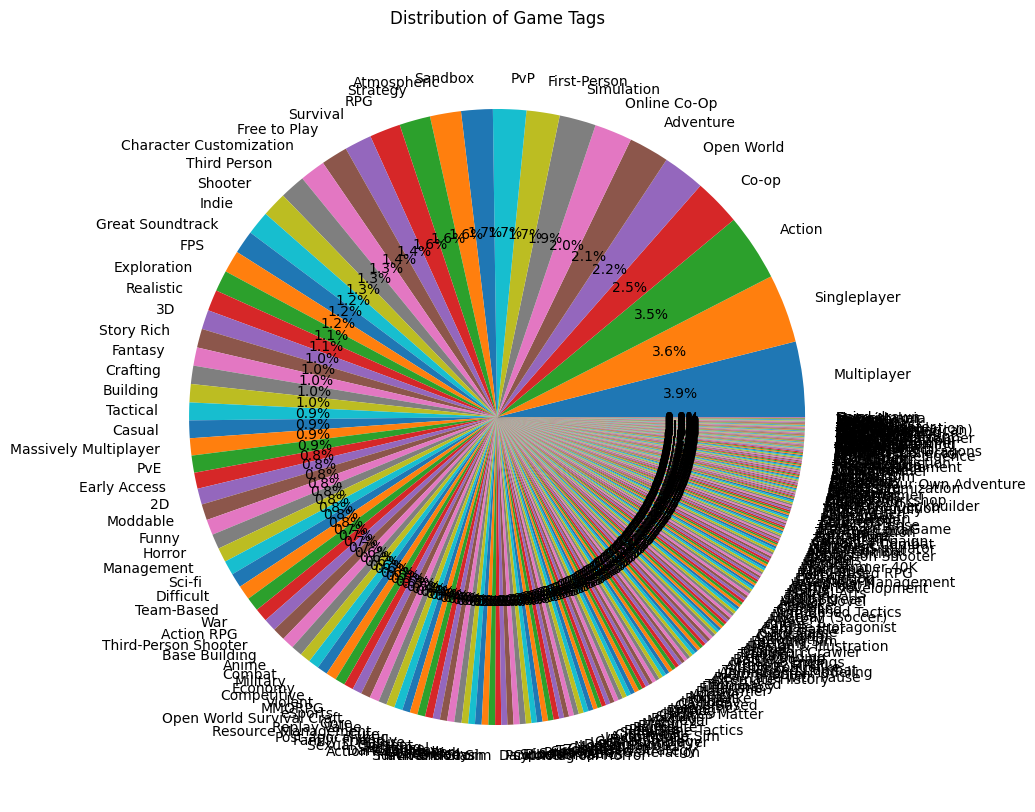

In [17]:
diff_tags.plot.pie(y = "count", autopct='%1.1f%%', figsize=(10, 10), title='Distribution of Game Tags')
plt.ylabel('')  # Hide the y-label
plt.show()

In [18]:
genre_player_counts = {}

for genre,playercounts in zip(games['Genres'], games['Current']):
    for g in genre:
        if g not in genre_player_counts:
            genre_player_counts[g] = []
        genre_player_counts[g].append(playercounts)

avg_players_per_genre = {genre: np.mean(playercounts) for genre, playercounts in genre_player_counts.items()}
avg_players_per_genre

{'Action': np.float64(47044.08910891089),
 'Free To Play': np.float64(72371.69565217392),
 'Strategy': np.float64(33787.97727272727),
 'Adventure': np.float64(32923.10144927536),
 'Massively Multiplayer': np.float64(40590.23333333333),
 'Casual': np.float64(30535.7),
 'Indie': np.float64(29467.01851851852),
 'Simulation': np.float64(27251.491228070176),
 'RPG': np.float64(25452.06779661017),
 'Sports': np.float64(31071.0),
 'Animation & Modeling': np.float64(32114.8),
 'Design & Illustration': np.float64(37600.25),
 'Photo Editing': np.float64(66252.5),
 'Utilities': np.float64(35993.0),
 'Early Access': np.float64(24875.846153846152),
 'None': np.float64(54791.0),
 'Education': np.float64(29672.0),
 'Game Development': np.float64(51194.0),
 'Racing': np.float64(20521.5),
 'Audio Production': np.float64(21652.0),
 'Video Production': np.float64(12525.666666666666),
 'Software Training': np.float64(8150.0)}

In [22]:
genre_player_hours = {}

for genre,playerHours in zip(games['Genres'], games['Player Hours']):
    for g in genre:
        if g not in genre_player_hours:
            genre_player_hours[g] = []
        genre_player_hours[g].append(playerHours)

avg_hours_per_genre = {genre: np.mean(playerHours) for genre, playerHours in genre_player_hours.items()}
avg_hours_per_genre

{'Action': np.float64(29864566.42857143),
 'Free To Play': np.float64(48617895.428571425),
 'Strategy': np.float64(22053261.36585366),
 'Adventure': np.float64(22954494.181818184),
 'Massively Multiplayer': np.float64(26734596.129032258),
 'RPG': np.float64(16562807.870967742),
 'Indie': np.float64(15090509.754716981),
 'Casual': np.float64(14397586.423076924),
 'Simulation': np.float64(13987447.339285715),
 'Early Access': np.float64(17893934.89473684),
 'Animation & Modeling': np.float64(19318298.333333332),
 'Design & Illustration': np.float64(21816324.4),
 'Photo Editing': np.float64(47196487.0),
 'Utilities': np.float64(18127307.57142857),
 'Education': np.float64(19417382.0),
 'Game Development': np.float64(18587136.5),
 'Racing': np.float64(13631625.2),
 'Sports': np.float64(16291260.3),
 'None': np.float64(24758701.0),
 'Audio Production': np.float64(10254104.0),
 'Video Production': np.float64(7417236.666666667),
 'Software Training': np.float64(5079827.0)}

In [20]:
recent_games = games[games['Days Since Release'] < 365]
recent_games.head(100)

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release,Tags,Recent Review Score,Recent Review Count,All Review Score,All Review Count,Date Collected
3,4.0,Bongo Cat,150380,185291,3419430,108683711,"[Casual, Indie, Simulation, Free To Play]","Mar 5, 2025",128.0,"[Cats, Free to Play, Clicker, Casual, Cute, Id...",9.0,4579.0,9.0,27926.0,07-11-2025
5,6.0,Marvel Rivals,130829,139160,2767030,51268567,"[Action, Free To Play]","Dec 5, 2024",218.0,"[Free to Play, Multiplayer, Hero Shooter, Thir...",5.0,8954.0,6.0,297857.0,07-11-2025
7,8.0,Delta Force,95627,192993,2507950,62190578,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 4, 2024",219.0,"[Free to Play, FPS, Multiplayer, Singleplayer,...",5.0,8149.0,5.0,122086.0,07-11-2025
9,10.0,EA SPORTS FC 25,86256,90339,2669320,39167785,"[Simulation, Sports]","Sep 26, 2024",288.0,"[Sports, Football (Soccer), Controller, Multip...",5.0,9009.0,5.0,78371.0,07-11-2025
17,18.0,Dune: Awakening,65996,189126,1172710,63757651,"[Action, Adventure, Massively Multiplayer, RPG]","Jun 10, 2025",31.0,"[Open World Survival Craft, Massively Multipla...",6.0,31598.0,6.0,45702.0,07-11-2025
23,24.0,PEAK,56125,113552,3527290,29609218,"[Action, Adventure, Indie]","Jun 16, 2025",25.0,"[Physics, Multiplayer, Online Co-Op, Co-op, Ex...",8.0,41993.0,8.0,41993.0,07-11-2025
26,27.0,7 Days to Die,53154,82843,251570,28981056,"[Action, Adventure, Indie, RPG, Simulation, St...","Jul 25, 2024",351.0,"[Survival, Zombies, Multiplayer, Open World, O...",6.0,3314.0,8.0,256231.0,07-11-2025
27,28.0,ELDEN RING NIGHTREIGN,51616,163451,2622380,61989622,"[Action, RPG]","May 29, 2025",43.0,"[Souls-like, Online Co-Op, Roguelike, Multipla...",8.0,24451.0,8.0,88115.0,07-11-2025
33,34.0,R.E.P.O.,45897,69134,3241660,27410702,"[Action, Early Access]","Feb 26, 2025",135.0,"[Early Access, Horror, Online Co-Op, Multiplay...",8.0,17622.0,9.0,173310.0,07-11-2025
35,36.0,Umamusume: Pretty Derby,43502,50475,3224770,9869898,"[Simulation, Sports, Free To Play]","Jun 24, 2025",17.0,"[Sports, Anime, Cute, Horses, Simulation, Free...",8.0,10842.0,8.0,10842.0,07-11-2025


In [21]:
not_recent_games = games[games['Days Since Release'] > 365]
not_recent_games.head(100)

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release,Tags,Recent Review Score,Recent Review Count,All Review Score,All Review Count,Date Collected
0,1.0,Counter-Strike 2,1049935,1725815,730,722199180,"[Action, Free To Play]","Aug 21, 2012",4707.0,"[FPS, Shooter, Multiplayer, Competitive, Actio...",8.0,68730.0,8.0,8884766.0,07-11-2025
1,2.0,Dota 2,515040,641549,570,300478436,"[Action, Strategy, Free To Play]","Jul 9, 2013",4385.0,"[Free to Play, MOBA, Multiplayer, Strategy, eS...",6.0,17792.0,8.0,2517279.0,07-11-2025
2,3.0,PUBG: BATTLEGROUNDS,312389,778327,578080,226521314,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 21, 2017",2759.0,"[Survival, Shooter, Battle Royale, Multiplayer...",5.0,18056.0,5.0,2576046.0,07-11-2025
4,5.0,Rust,143534,187345,252490,73547966,"[Action, Adventure, Indie, Massively Multiplay...","Feb 8, 2018",2710.0,"[Survival, Crafting, Multiplayer, Open World, ...",8.0,9831.0,8.0,1029310.0,07-11-2025
6,7.0,Banana,97854,120341,2923300,67697561,"[Adventure, Casual, Simulation, Strategy, Free...","Apr 23, 2024",444.0,"[Free to Play, Clicker, Singleplayer, 2D, Casu...",6.0,1061.0,8.0,90272.0,07-11-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124.0,Hogwarts Legacy,11993,17211,990080,5661505,"[Action, Adventure, RPG]","Feb 10, 2023",882.0,"[Magic, Open World, Fantasy, Singleplayer, Adv...",8.0,2647.0,8.0,235222.0,07-11-2025
124,125.0,"Warhammer 40,000: Rogue Trader",11888,17534,2186680,5080503,"[Action, Adventure, Indie, RPG, Strategy]","Dec 7, 2023",582.0,"[Action, Strategy, RPG, Warhammer 40K, Charact...",8.0,949.0,8.0,22749.0,07-11-2025
125,126.0,Arma Reforger,11756,18032,1874880,6861065,"[Action, Simulation, Strategy]","Nov 16, 2023",603.0,"[Military, Simulation, Shooter, Action, Realis...",8.0,1724.0,6.0,29974.0,07-11-2025
126,127.0,Russian Fishing 4,11716,26097,766570,9529659,"[Adventure, Casual, Massively Multiplayer, RPG...","Nov 10, 2021",1339.0,"[Fishing, Multiplayer, Free to Play, Simulatio...",6.0,1235.0,5.0,74759.0,07-11-2025


In [22]:
genre_player_hours = {}

for genre,playerHours in zip(not_recent_games['Genres'], not_recent_games['Player Hours']):
    for g in genre:
        if g not in genre_player_hours:
            genre_player_hours[g] = []
        genre_player_hours[g].append(playerHours)

avg_hours_per_genre_old = {genre: np.mean(playerHours) for genre, playerHours in genre_player_hours.items()}
avg_hours_per_genre_old

{'Action': np.float64(31994669.666666668),
 'Free To Play': np.float64(53580138.02857143),
 'Strategy': np.float64(21646806.405405406),
 'Adventure': np.float64(21873098.16981132),
 'Massively Multiplayer': np.float64(25841388.0),
 'Indie': np.float64(16461427.795454545),
 'RPG': np.float64(16678118.613636363),
 'Casual': np.float64(18422669.333333332),
 'Simulation': np.float64(14243935.48888889),
 'Animation & Modeling': np.float64(22985123.8),
 'Design & Illustration': np.float64(26823863.25),
 'Photo Editing': np.float64(47284481.0),
 'Utilities': np.float64(24875877.4),
 'Early Access': np.float64(15264369.1),
 'Sports': np.float64(15894432.714285715),
 'Education': np.float64(19133272.5),
 'Game Development': np.float64(32255630.0),
 'Racing': np.float64(10632334.25),
 'Audio Production': np.float64(12244197.0),
 'Video Production': np.float64(8633685.0),
 'Software Training': np.float64(6010915.0)}

In [31]:
genre_player_hours = {}

for genre,playerHours in zip(recent_games['Genres'], recent_games['Player Hours']):
    for g in genre:
        if g not in genre_player_hours:
            genre_player_hours[g] = []
        genre_player_hours[g].append(playerHours)

avg_hours_per_genre_recent = {genre: np.mean(playerHours) for genre, playerHours in genre_player_hours.items()}
avg_hours_per_genre_recent

{'Action': np.float64(27737388.42105263),
 'Free To Play': np.float64(39675147.6),
 'Adventure': np.float64(23342804.529411763),
 'RPG': np.float64(17893196.2),
 'Casual': np.float64(17691732.85714286),
 'Simulation': np.float64(14803092.0),
 'Strategy': np.float64(17874923.4),
 'Massively Multiplayer': np.float64(43889291.25),
 'Early Access': np.float64(21431181.5),
 'Sports': np.float64(18696861.0),
 'Indie': np.float64(8683003.888888888)}

In [39]:
genre_comparison = pd.DataFrame({
    'Recent Genre Distribution': avg_hours_per_genre_recent,
    'Old Genre Distribution': avg_hours_per_genre_old
})

print(genre_comparison.dropna())

                       Recent Genre Distribution  Old Genre Distribution
Action                              2.773739e+07            3.033452e+07
Free To Play                        3.967515e+07            5.141250e+07
Adventure                           2.334280e+07            2.281977e+07
RPG                                 1.789320e+07            1.613822e+07
Casual                              1.769173e+07            1.318395e+07
Simulation                          1.480309e+07            1.366119e+07
Strategy                            1.787492e+07            2.340111e+07
Massively Multiplayer               4.388929e+07            2.419316e+07
Early Access                        2.143118e+07            1.626136e+07
Sports                              1.869686e+07            1.526029e+07
Indie                               8.683004e+06            1.640114e+07


In [29]:
print(type(GenreCounts))

<class 'pandas.core.frame.DataFrame'>


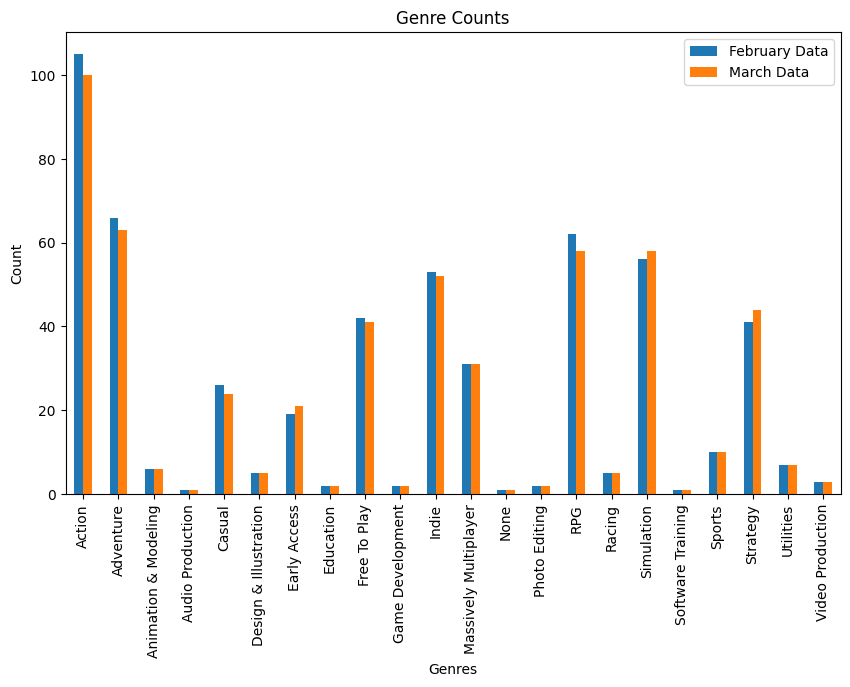

In [33]:
# Create bar plot
GenreCounts.plot(kind='bar', x='Genres', y=['February Data', 'March Data'], figsize=(10, 6))

# Labels and title
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Genre Counts")

# Show the plot
plt.show()

In [11]:
highest_player_hours = games.sort_values(by='Player Hours', ascending=False).head(10)
highest_player_hours

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release
0,1.0,Counter-Strike 2,589411,1599759,730,671649980,"[Action, Free To Play]","Aug 21, 2012",4559.0
2,3.0,Dota 2,271976,714888,570,313409594,"[Action, Strategy, Free To Play]","Jul 9, 2013",4237.0
3,4.0,PUBG: BATTLEGROUNDS,109129,786821,578080,213853616,"[Action, Adventure, Massively Multiplayer, Fre...","Dec 21, 2017",2611.0
1,2.0,Marvel Rivals,296620,496193,2767030,194874053,"[Action, Free To Play]","Dec 5, 2024",70.0
7,8.0,Path of Exile 2,76585,290410,2694490,101815593,"[Action, Adventure, Massively Multiplayer, RPG...","Dec 6, 2024",69.0
9,10.0,Grand Theft Auto V,72075,211328,271590,90506929,"[Action, Adventure]","Apr 13, 2015",3594.0
5,6.0,Rust,105613,232431,252490,84456109,"[Action, Adventure, Indie, Massively Multiplay...","Feb 8, 2018",2562.0
6,7.0,Banana,100867,195279,2923300,81339706,"[Adventure, Casual, Simulation, Strategy, Free...","Apr 23, 2024",296.0
30,31.0,NARAKA: BLADEPOINT,33519,223654,1203220,61037699,"[Action, Adventure, Massively Multiplayer]","Aug 11, 2021",1282.0
16,17.0,Wallpaper Engine,54712,136686,431960,60638037,"[Casual, Indie, Animation & Modeling, Design &...","Nov 16, 2018",2281.0


In [3]:
see = pd.read_csv("testing_new_functions.csv")
see.head()

,Rank,Game,Current,Peak,App ID,Player Hours,Genres,Release Date,Days Since Release,Tags,Recent Review Score,Recent Review Count,All Review Score,All Review Count
0,1.0,Counter-Strike 2,1110441,1783434,730,754148388,"['Action', 'Free To Play']","Aug 21, 2012",4581,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",8,"97,757",8,"8,623,762"
1,2.0,Monster Hunter Wilds,433016,1179869,2246340,52793493,"['Action', 'Adventure', 'RPG']","Feb 27, 2025",8,"['Hunting', 'Action', 'Multiplayer', 'Online C...",5,"81,275",5,"60% of 81,275) All Tim"
2,3.0,Dota 2,428618,708043,570,316204618,"['Action', 'Strategy', 'Free To Play']","Jul 9, 2013",4259,"['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",8,"29,831",8,"2,450,661"
3,4.0,Marvel Rivals,212988,437272,2767030,157803054,"['Action', 'Free To Play']","Dec 5, 2024",92,"['Free to Play', 'Multiplayer', 'Hero Shooter'...",6,"40,230",8,"239,004"
4,5.0,Rust,178065,232431,252490,89284465,"['Action', 'Adventure', 'Indie', 'Massively Mu...","Feb 8, 2018",2584,"['Survival', 'Crafting', 'Multiplayer', 'Open ...",8,"17,334",8,"991,942"


In [ ]:
import re
import os

def add_date_col(folder_path = "Steam Data"):
  # Regex pattern to match date from filename: steam_top_games_06-24-2025_13-46-33.csv
    date_pattern = re.compile(r"steam_top_games_(\d{2}-\d{2}-\d{4})_\d{2}-\d{2}-\d{2}\.csv")

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            match = date_pattern.search(filename)
            if match:
                date_collected = match.group(1)  # Extracted date as MM-DD-YYYY
                file_path = os.path.join(folder_path, filename)
                df = pd.read_csv(file_path)

                # Only add the column if it doesn't already exist
                if "Date Collected" not in df.columns:
                    df["Date Collected"] = date_collected
                    df.to_csv(file_path, index=False)
                    print(f"Added 'Date Collected' to: {filename}")
                else:
                    print(f"'Date Collected' already exists in: {filename}")

In [ ]:
from apify_client import ApifyClient

# Initialize the ApifyClient with your Apify API token
# Replace '<YOUR_API_TOKEN>' with your token.
client = ApifyClient("<YOUR_API_TOKEN>")

# Prepare the Actor input
run_input = { "app_id": "764670" }

# Run the Actor and wait for it to finish
run = client.actor("danek/steam-reviews").call(run_input=run_input)

# Fetch and print Actor results from the run's dataset (if there are any)
print("💾 Check your data here: https://console.apify.com/storage/datasets/" + run["defaultDatasetId"])
for item in client.dataset(run["defaultDatasetId"]).iterate_items():
    print(item)

# 📚 Want to learn more 📖? Go to → https://docs.apify.com/api/client/python/docs/quick-start